<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/06_image_preprocessing_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image preprocessing with OpenCV


**Reference**

https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

https://stackoverflow.com/questions/33949831/how-to-remove-all-lines-and-borders-in-an-image-while-keeping-text-programmatica

https://github.com/wjbmattingly/ocr_python_textbook/blob/main/02_02_working%20with%20opencv.ipynb

##Setup

In [ ]:
%%shell

sudo apt install tesseract-ocr
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0

After install, just restart the colab environment.

In [ ]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
!tesseract --version

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [ ]:
def img_display(im_data):
    dpi = 80
    #im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
image_name = 'sample2.png'

## Image preprocessing

###Obtain binary image

In [ ]:
image = cv2.imread(image_name)

# Binarization
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding 
img_thresh, img_binary = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

###Noise Removal



In [ ]:
def noise_removal(image):
  kernel = np.ones((1, 1), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)

  kernel = np.ones((1, 1), np.uint8)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  image = cv2.medianBlur(image, 3)

  return image

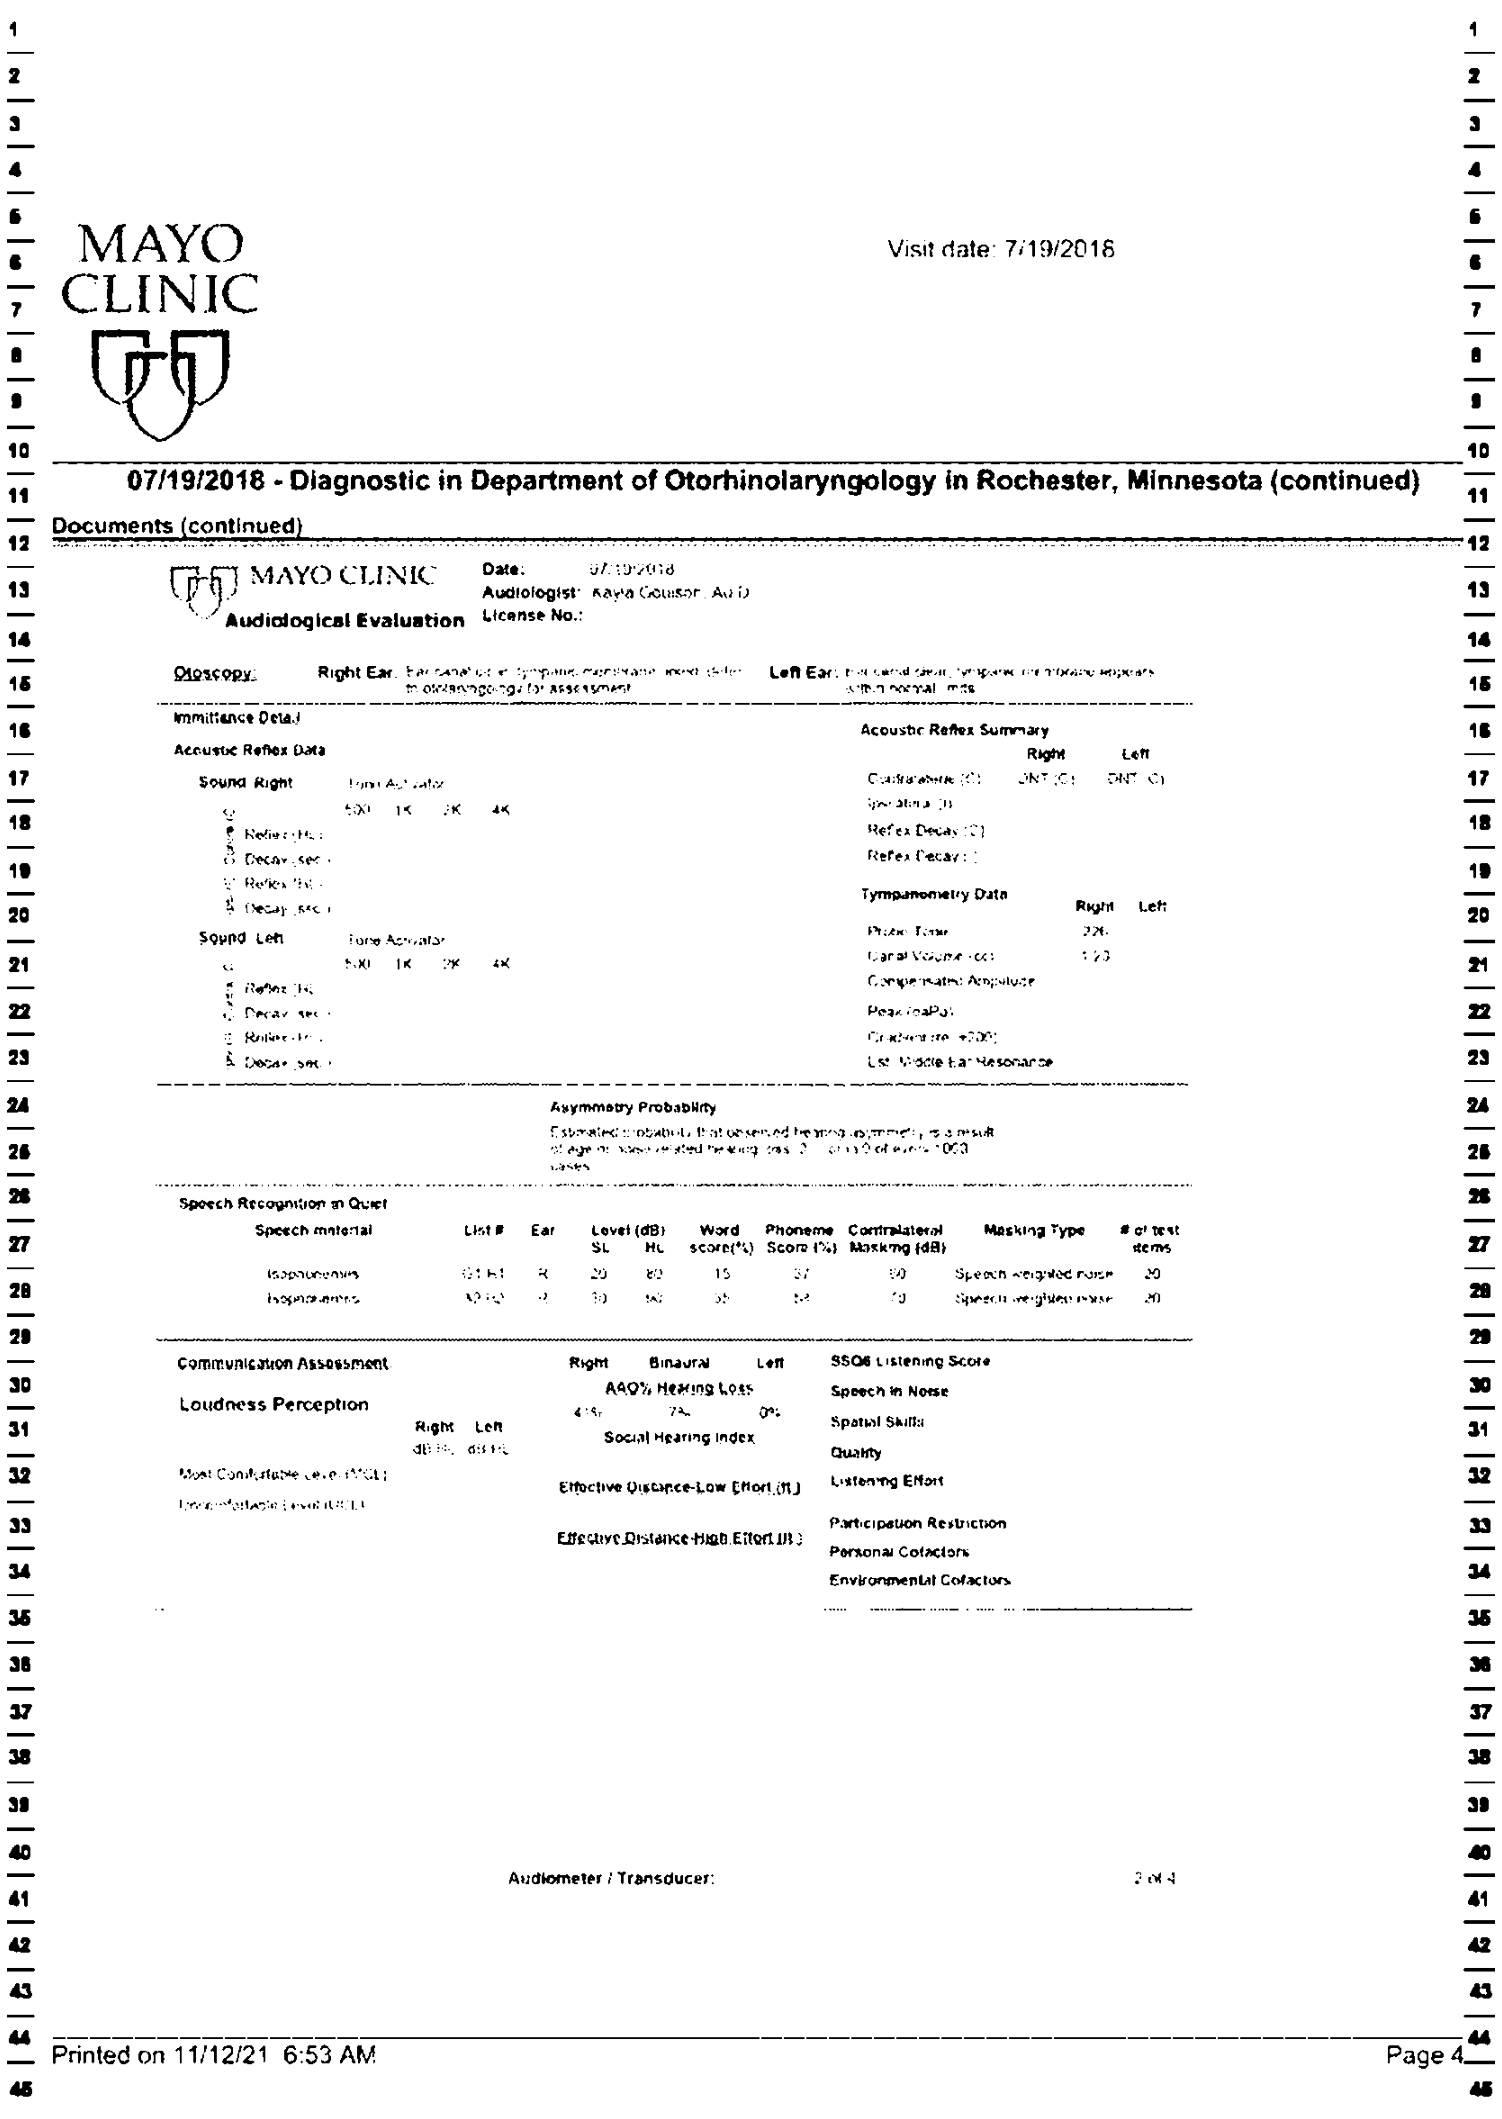

In [ ]:
# removing noise
noise_removed = noise_removal(img_binary)

img_display(noise_removed)

###Decrease font thickness using Erosion

In [ ]:
def thin_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2, 2), np.uint8)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.bitwise_not(image)
  
  return image

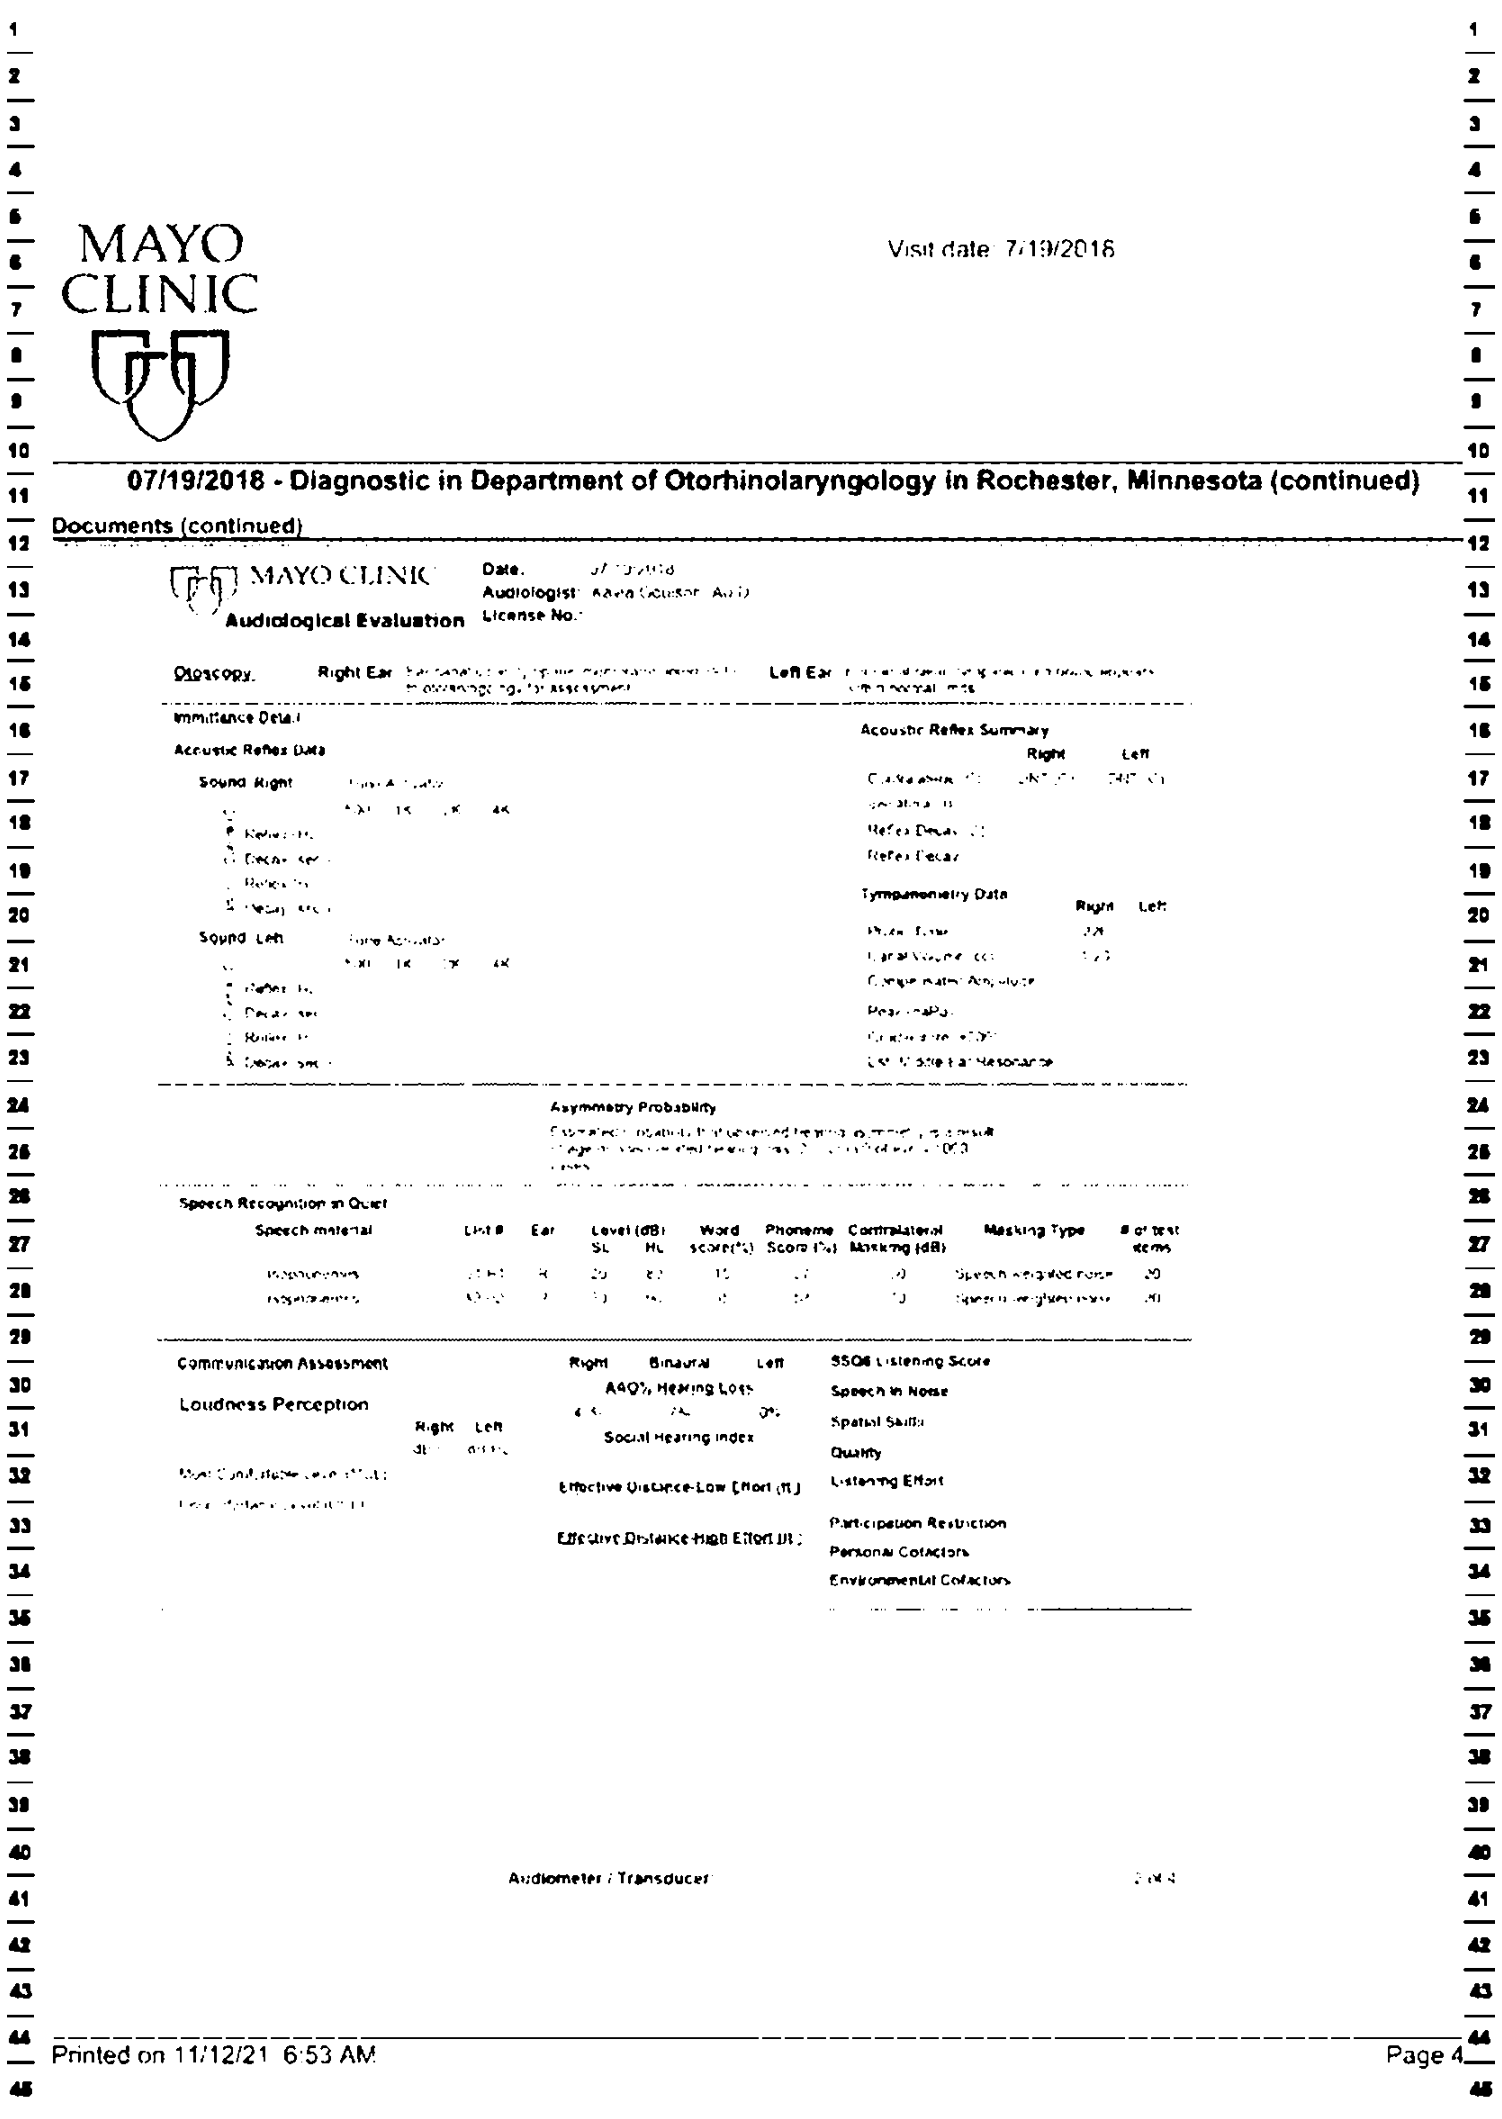

In [ ]:
# apply erosion
eroded_image = noise_removal(noise_removed)

img_display(eroded_image)

###Increase font thickness using Dilation

In [ ]:
def thick_font(image):
  image = cv2.bitwise_not(image)
  kernel = np.ones((2, 2), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)
  image = cv2.bitwise_not(image)
  
  return image

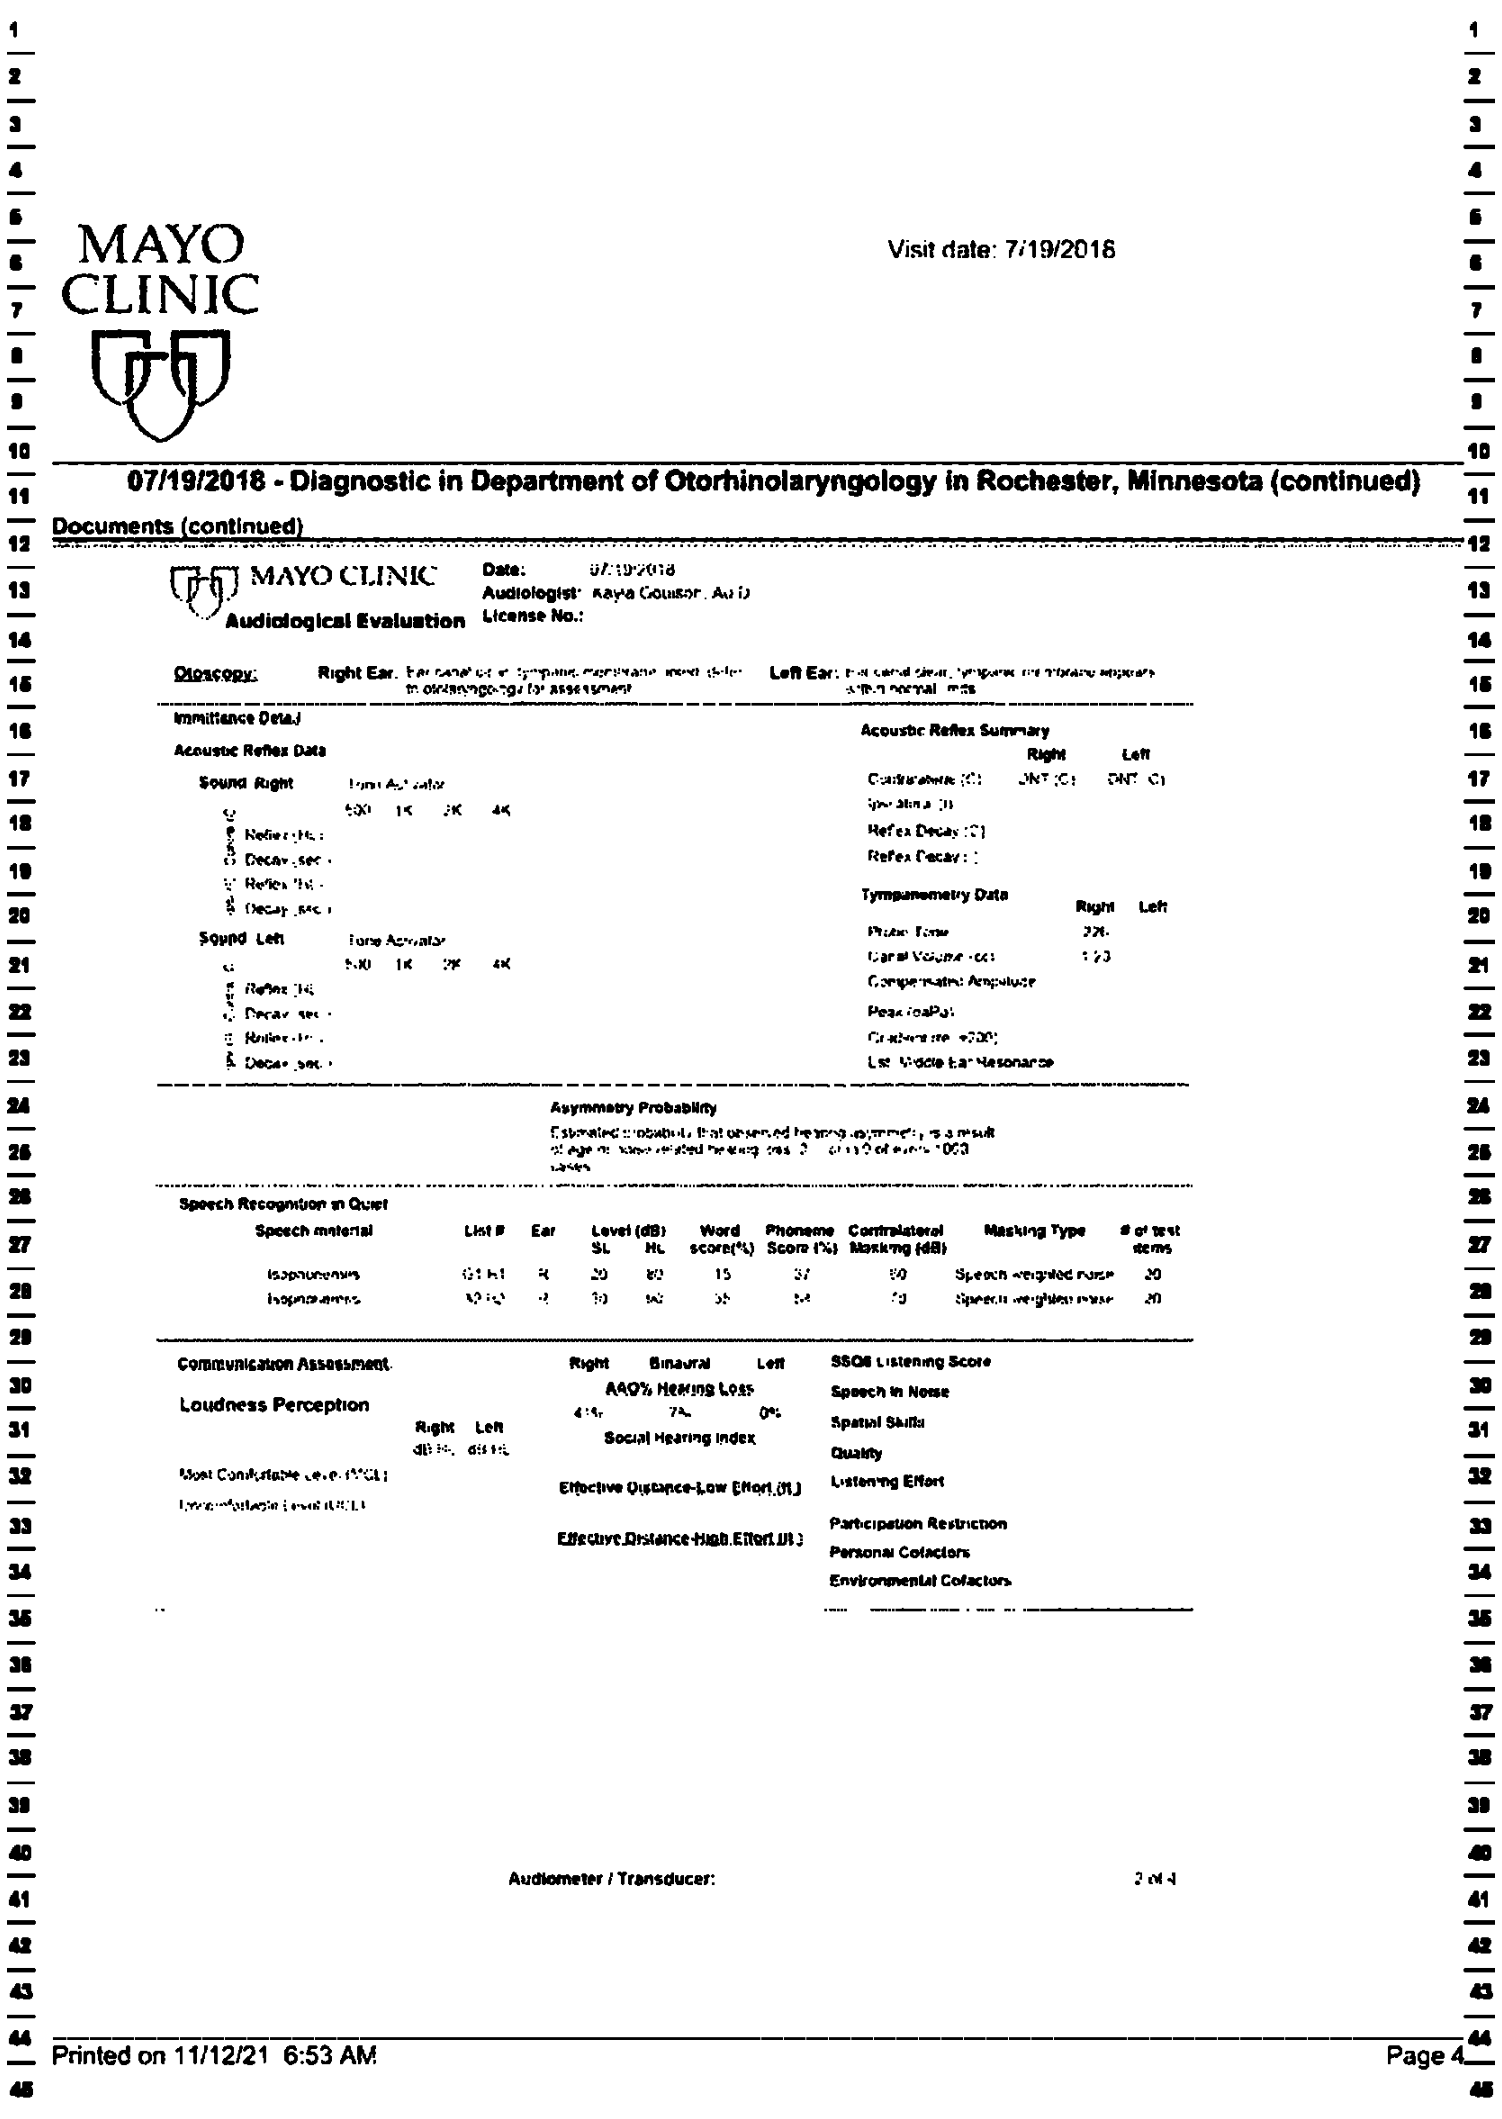

In [ ]:
# apply dilation
dilated_image = thick_font(noise_removed)
img_display(dilated_image)

##Combining image preprocessing and OCR

###Image preprocessing

In [ ]:
def image_preprocessing(image_path, font_thick=False):
  image = cv2.imread(image_name)

  ############ Step-1: Image Binarization ##############################
  # Binarization
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Thresholding 
  img_thresh, img_binary = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

  ############ Step-2: Noise removal ###################################
  # removing noise
  image = noise_removal(img_binary)

  ############ Step-3: Image dilation ###################################
  if font_thick:
    # increase font thickness using dilation
    image = thick_font(image)

  return image

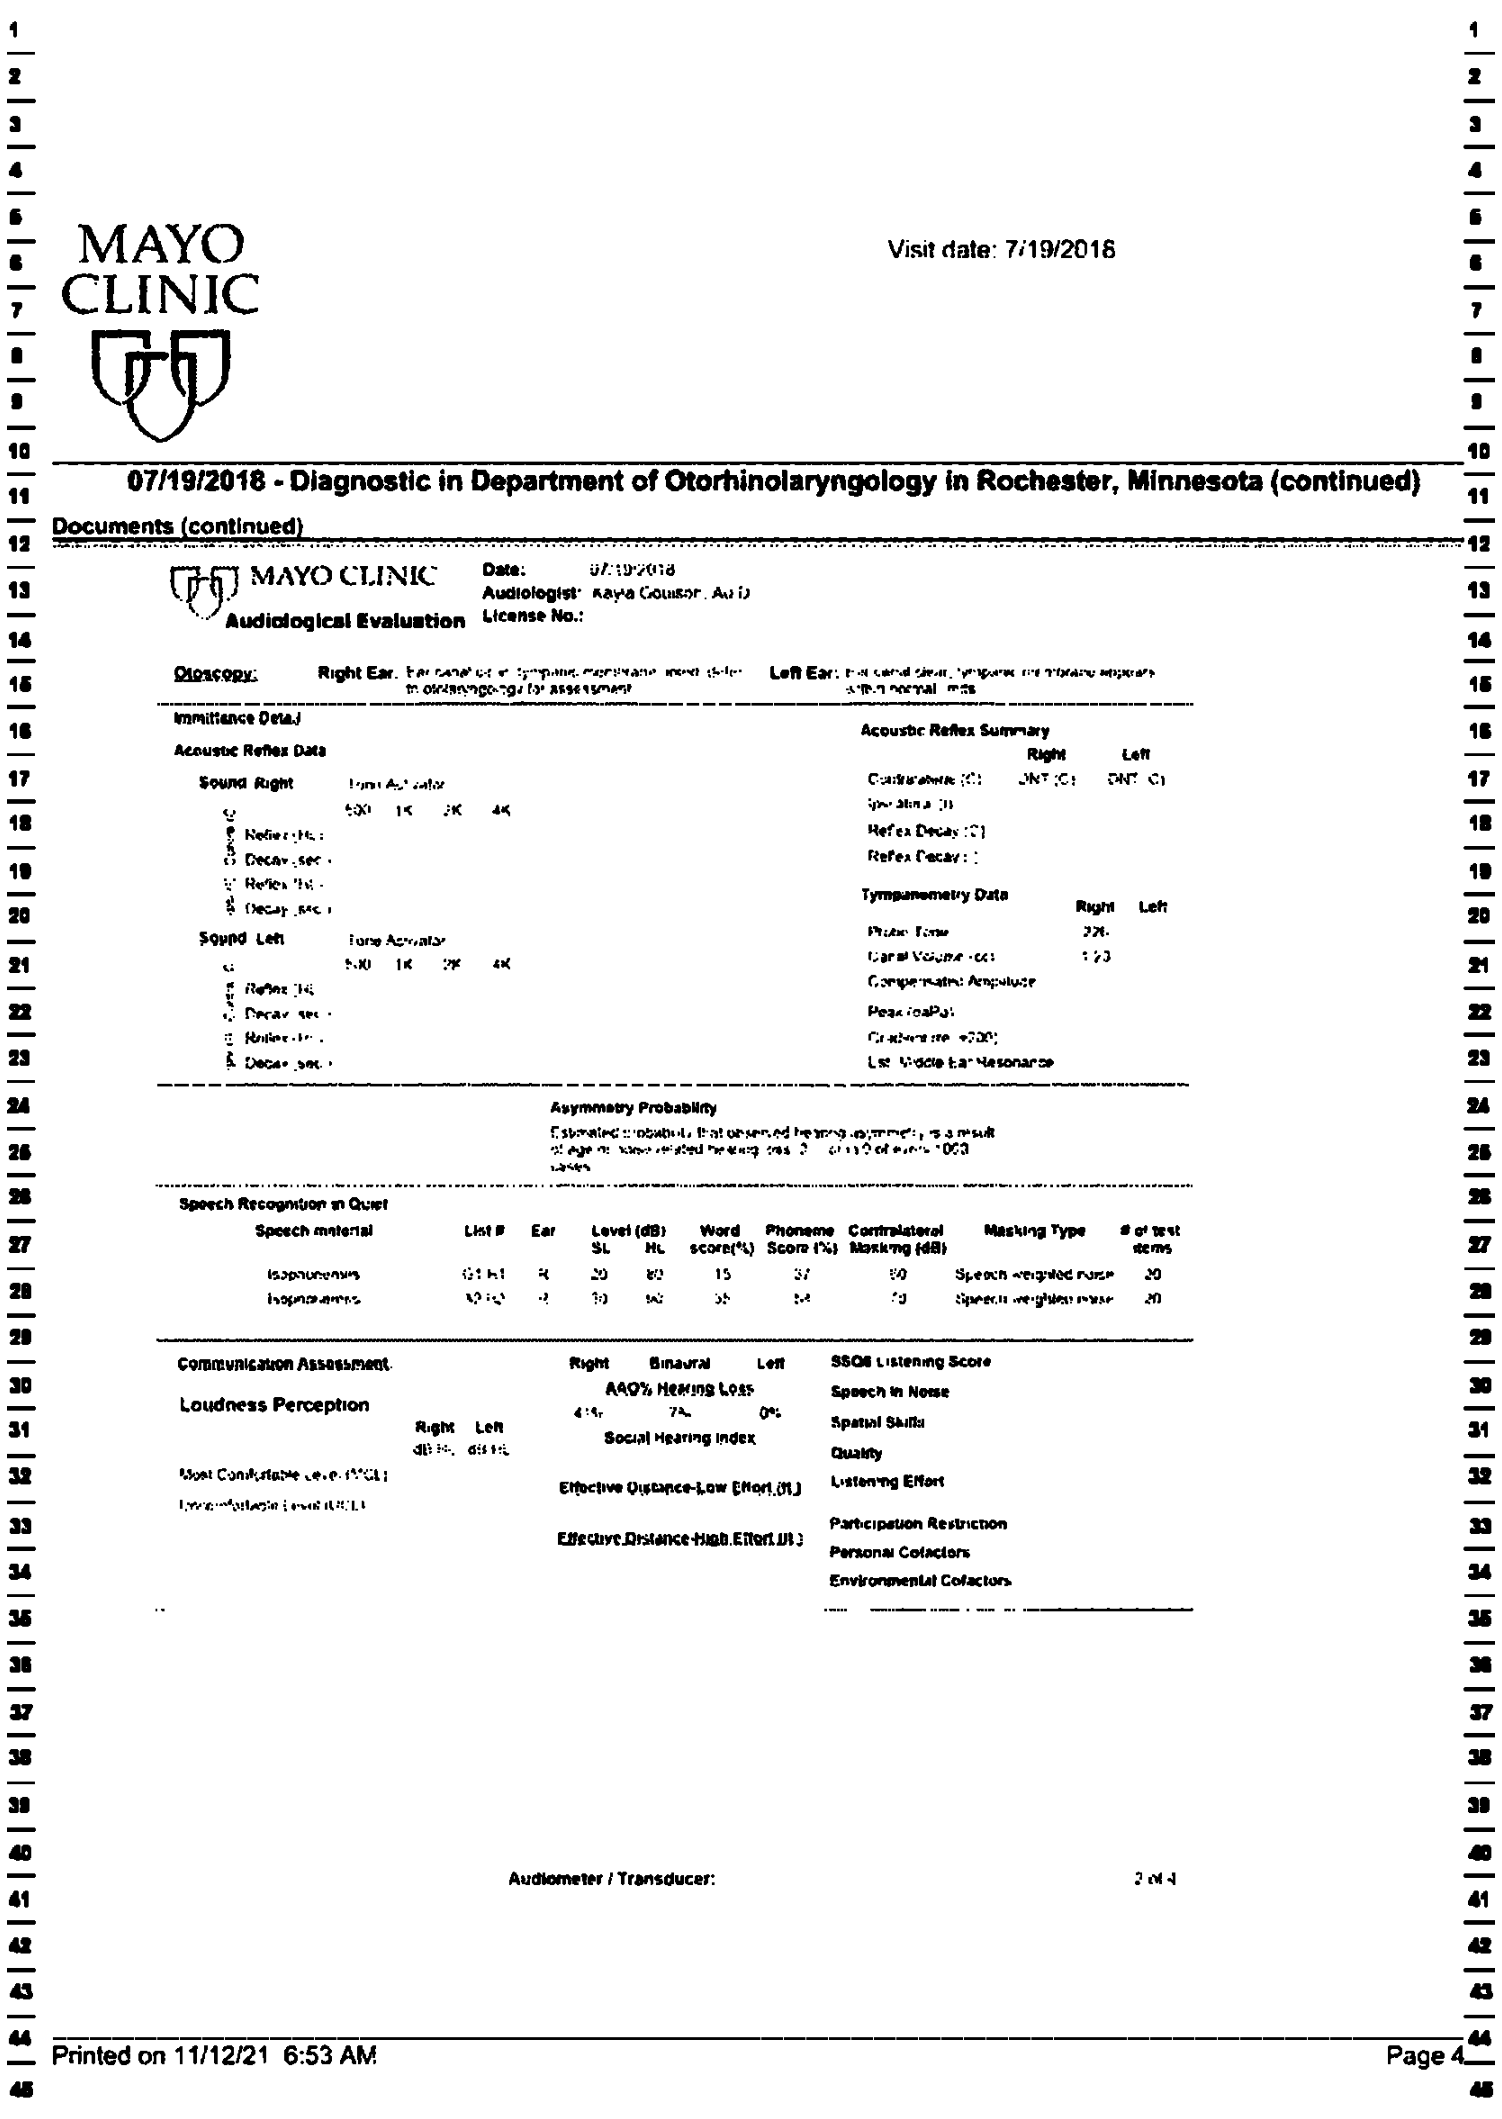

In [ ]:
cleaned_image = image_preprocessing(image_name, font_thick=True)

img_display(cleaned_image)

###Image OCR

In [ ]:
############ Step-4: Image OCR ###################################
custom_config = r'--oem 3 --psm 6'
print('--------------------------------------------------------------')
# extract text from image
print(pytesseract.image_to_string(cleaned_image, config=custom_config))
print('--------------------------------------------------------------')

--------------------------------------------------------------
4 4

2 2

a a

4 4

6 6

~ MAYO Visit date: 7/19/2018 Tv
7 CLINIC 7

a | a

8 8

10 10
aa 07/19/2018 - Diagnostic in Department of Otorhinolaryngology in Rochester, Minnesota (continued) a
7, Documents (continued) —
1 (Fg) Mavo clinic ae a a
13 . i) . Audiologist’ Raya Gomsor. Au i a3
— -” mudiological Evaluation ‘{cense No.: —
14 14
Te Olossopy: Right Ear. bar cane oe poping. merietane woe ite: Left Ear. bat ceed siren ymiganec ee Thtary appear ~~
46 th otrenernge.tgs f° ARSEASmant Ah sepals 416
16 immittance Oetad Acoustc Reflex Summary 16
_—_ Acousne Reflex Data Right tet —
17 Sound mught lon AL calor Cuetec: ONT Cr ONT 17
i. e exo i HK 4K Sper aks oy —
is £ Refiec ihe: Refea Decay 5) 18
_ 8 Gecar.sec- Refea Cacay: * —
90 & Decay ste Can ed Right Lett 20
— Soved Let fone Acesale rte Terme am _
24 & 01K oy ak (arm Vesna +e: 173 m”
__ ® Refer hi Gamperate: Anpulvce —_—

£ aS
22 ah Recay sec + Peas ‘cao: 2
— H ftokoc-be . C